In [6]:
# Notebook for HRI results analysis

import numpy as np
import pandas as pd
from scipy.stats import pearsonr, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [13]:
df = pd.read_csv("results_fin.csv")
df

,age,gender,nationality,ethnicity,education,employment_status,robot_experience,tech,height_cm,help_robot,...,no_care_about,move_artificial,friendly,indifferent,participant_id,condition,time_help_robot,help_attempts,interaction_time,experiment_runtime
0,22,Female,Spain,White-Other,Foundation-degree-or-some-university-studies,Full-time-student-(including-PhD-student),1,4,171,5,...,1,2,4,2,101,Acknowledgement,37,4,300,227
1,21,Female,Spain,White-Other,Undergraduate-degree,Full-time-student-(including-PhD-student),1,3,162,5,...,1,3,4,2,102,Non-acknowledgement,32,4,167,181
2,21,Male,Spain,White-Other,Undergraduate-degree,Full-time-student-(including-PhD-student),1,4,173,4,...,2,3,5,3,103,Baseline,2,1,165,175
3,25,Male,UK,White-British,Doctorate-(PhDorDPhil),Full-time-employment,3,5,186,4,...,3,4,3,2,104,Acknowledgement,25,3,177,190
4,28,Male,UK,White-British,A-Level-or-equivalent,Full-time-employment,1,5,180,3,...,3,4,5,3,105,Non-acknowledgement,39,7,180,184
5,29,Male,UK,White-British,Undergraduate-degree,Full-time-employment,3,4,183,3,...,4,4,4,3,106,Baseline,1,1,200,209
6,25,Male,Spain,Any-other-ethnic-background,Postgraduate-degree,Full-time-employment,4,4,180,5,...,3,5,3,5,107,Acknowledgement,50,3,240,249
7,47,Female,UK,White-British,Foundation-degree-or-some-university-studies,Full-time-employment,1,4,165,5,...,3,5,5,2,108,Non-acknowledgement,90,11,228,225
8,22,Female,UK,White-British,Undergraduate-degree,Full-time-student-(including-PhD-student),1,1,170,3,...,1,4,5,3,110,Baseline,1,1,165,173
9,29,Female,US,White-Other,Postgraduate-degree,Full-time-employment,1,5,157,1,...,5,4,5,5,110,Acknowledgement,30,2,144,171


In [14]:
df=df[["condition","robot_experience","tech","time_help_robot","help_attempts","experiment_runtime"]].dropna()
df

,condition,robot_experience,tech,time_help_robot,help_attempts,experiment_runtime
0,Acknowledgement,1,4,37,4,227
1,Non-acknowledgement,1,3,32,4,181
2,Baseline,1,4,2,1,175
3,Acknowledgement,3,5,25,3,190
4,Non-acknowledgement,1,5,39,7,184
5,Baseline,3,4,1,1,209
6,Acknowledgement,4,4,50,3,249
7,Non-acknowledgement,1,4,90,11,225
8,Baseline,1,1,1,1,173
9,Acknowledgement,1,5,30,2,171


In [15]:
df.groupby("condition").mean()

,robot_experience,tech,time_help_robot,help_attempts,experiment_runtime
condition,,,,,
Acknowledgement,1.833333,4.500000,44.333333,3.833333,220.166667
Baseline,1.666667,3.500000,1.166667,1.000000,175.000000
Non-acknowledgement,1.666667,4.166667,45.000000,5.666667,201.000000


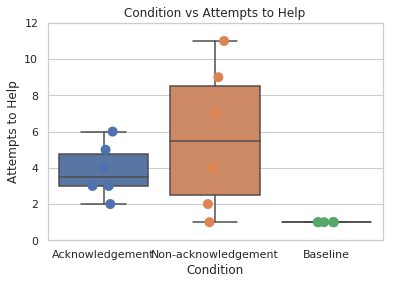

In [14]:
sns.boxplot(data=df,x="condition",y="help_attempts")
sns.stripplot(data=df,x="condition",y="help_attempts", size=10)
plt.ylim(0,12)
plt.xlabel("Condition")
plt.ylabel("Attempts to Help")
plt.title("Condition vs Attempts to Help")
plt.savefig('condition_vs_attemptstohelp.png')

In [16]:
df.groupby("condition").std()

,robot_experience,tech,time_help_robot,help_attempts,experiment_runtime
condition,,,,,
Acknowledgement,1.329160,0.547723,17.258814,1.471960,33.005555
Baseline,0.816497,1.378405,0.408248,0.000000,19.152023
Non-acknowledgement,0.816497,0.752773,29.291637,3.983298,27.985711


/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


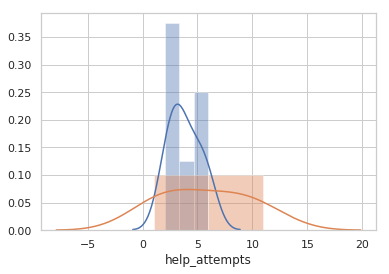

In [16]:
sns.distplot(df[df.condition=="Acknowledgement"]["help_attempts"])
sns.distplot(df[df.condition=="Non-acknowledgement"]["help_attempts"])

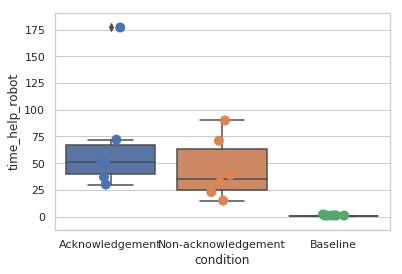

In [17]:
sns.boxplot(data=df,x="condition",y="time_help_robot")
sns.stripplot(data=df,x="condition",y="time_help_robot", size=10)

/home/michael/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


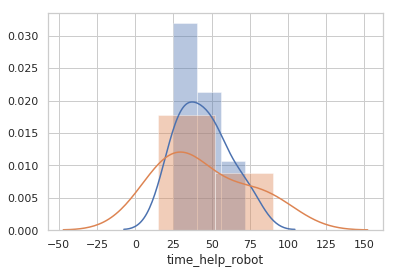

In [17]:
sns.distplot(df[df.condition=="Acknowledgement"]["time_help_robot"])
sns.distplot(df[df.condition=="Non-acknowledgement"]["time_help_robot"])

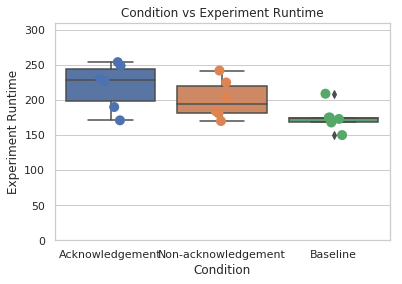

In [20]:
sns.boxplot(data=df,x="condition",y="experiment_runtime")
sns.stripplot(data=df,x="condition",y="experiment_runtime", size=10)
plt.ylim(0,310)
plt.xlabel("Condition")
plt.ylabel("Experiment Runtime")
plt.title("Condition vs Experiment Runtime")
plt.savefig('condition_vs_runtime.png')

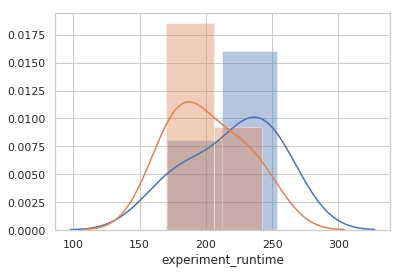

In [19]:
sns.distplot(df[df.condition=="Acknowledgement"]["experiment_runtime"])
sns.distplot(df[df.condition=="Non-acknowledgement"]["experiment_runtime"])

In [21]:
df_ass = pd.read_csv("results_fin.csv")
df_ass = df_ass[["condition","gender","help_robot","sorry_robot","unfriendly","anxious","natural_movement","shy","no_sorry_robot","likeable","enjoy_talking","at_ease","persuasive","cared_about","insensitive","physically_competent","capable","relatable","assertive","appreciated_help","uncomfortable","no_enjoy_interaction","no_care_about","move_artificial","friendly","indifferent"]].dropna()
df_ass

,condition,gender,help_robot,sorry_robot,unfriendly,anxious,natural_movement,shy,no_sorry_robot,likeable,...,capable,relatable,assertive,appreciated_help,uncomfortable,no_enjoy_interaction,no_care_about,move_artificial,friendly,indifferent
0,Acknowledgement,Female,5,2,1,2,3,4,1,4,...,4,2,2,3,4,1,1,2,4,2
1,Non-acknowledgement,Female,5,1,1,4,3,1,1,5,...,2,2,3,4,1,5,1,3,4,2
2,Baseline,Male,4,3,2,2,2,3,2,4,...,3,3,3,4,3,1,2,3,5,3
3,Acknowledgement,Male,4,3,2,3,2,2,3,4,...,3,3,4,2,3,2,3,4,3,2
4,Non-acknowledgement,Male,3,3,2,3,4,3,2,4,...,4,3,2,3,3,4,3,4,5,3
5,Baseline,Male,3,2,2,4,2,2,4,4,...,3,3,3,3,4,2,4,4,4,3
6,Acknowledgement,Male,5,3,4,4,2,1,3,4,...,5,2,4,1,4,3,3,5,3,5
7,Non-acknowledgement,Female,5,2,2,2,3,4,4,4,...,4,4,3,4,1,1,3,5,5,2
8,Baseline,Female,3,4,2,4,2,4,3,4,...,3,4,1,2,2,3,1,4,5,3
9,Acknowledgement,Female,1,5,1,1,2,1,1,1,...,4,1,1,2,1,4,5,4,5,5


(0.5, 5.5)

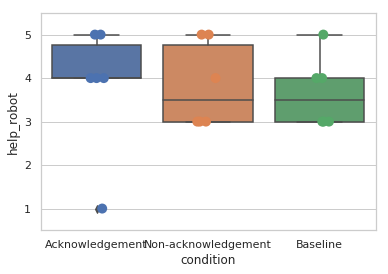

In [22]:
# I wanted to help the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="help_robot")
sns.stripplot(data=df_ass,x="condition",y="help_robot", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

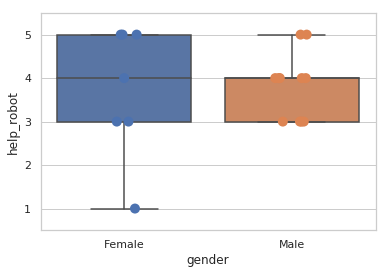

In [23]:
# I wanted to help the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="help_robot")
sns.stripplot(data=df_ass,x="gender",y="help_robot", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

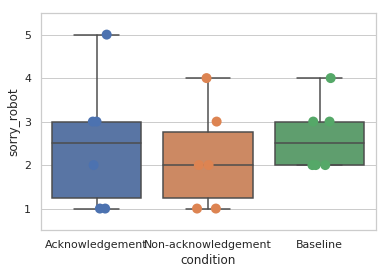

In [24]:
# I felt sorry for the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="sorry_robot")
sns.stripplot(data=df_ass,x="condition",y="sorry_robot", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

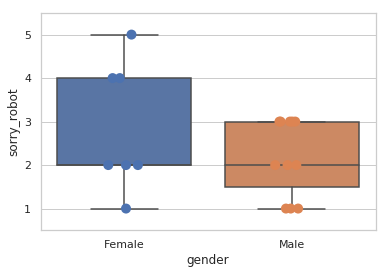

In [18]:
# I felt sorry for the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="sorry_robot")
sns.stripplot(data=df_ass,x="gender",y="sorry_robot", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

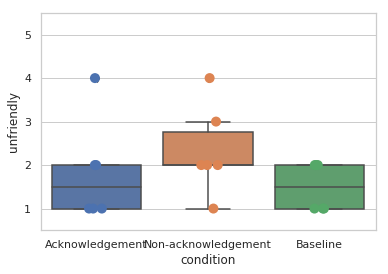

In [19]:
# I thought the robot was unfriendly vs condition
sns.boxplot(data=df_ass,x="condition",y="unfriendly")
sns.stripplot(data=df_ass,x="condition",y="unfriendly", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

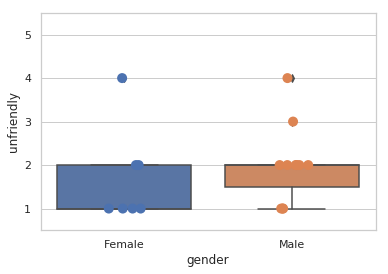

In [20]:
# I thought the robot was unfriendly vs gender
sns.boxplot(data=df_ass,x="gender",y="unfriendly")
sns.stripplot(data=df_ass,x="gender",y="unfriendly", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

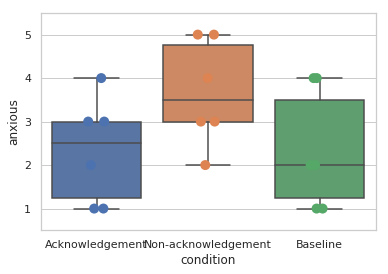

In [21]:
# The robot made me anxious vs condition
sns.boxplot(data=df_ass,x="condition",y="anxious")
sns.stripplot(data=df_ass,x="condition",y="anxious", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

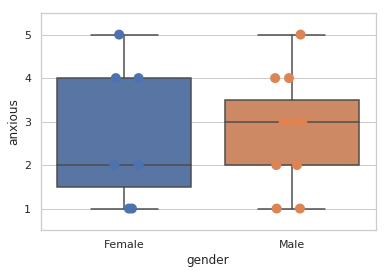

In [22]:
# The robot made me anxious vs gender
sns.boxplot(data=df_ass,x="gender",y="anxious")
sns.stripplot(data=df_ass,x="gender",y="anxious", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

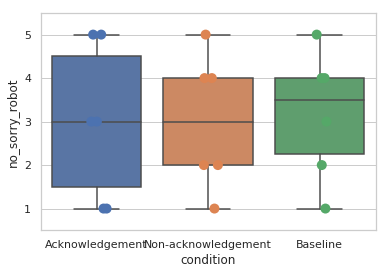

In [23]:
# I did not feel sorry for the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="no_sorry_robot")
sns.stripplot(data=df_ass,x="condition",y="no_sorry_robot", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

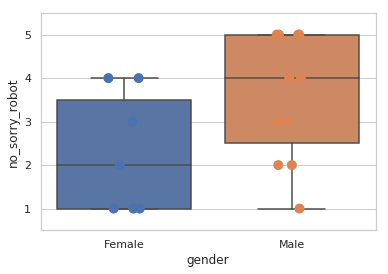

In [24]:
# I did not feel sorry for the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="no_sorry_robot")
sns.stripplot(data=df_ass,x="gender",y="no_sorry_robot", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

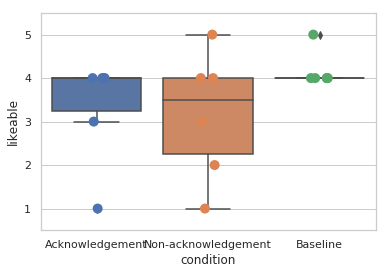

In [25]:
# I thought the robot was likeable vs condition
sns.boxplot(data=df_ass,x="condition",y="likeable")
sns.stripplot(data=df_ass,x="condition",y="likeable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

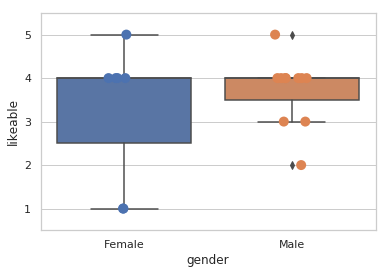

In [26]:
# I thought the robot was likeable vs gender
sns.boxplot(data=df_ass,x="gender",y="likeable")
sns.stripplot(data=df_ass,x="gender",y="likeable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

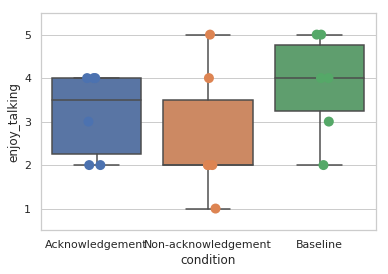

In [27]:
# I enjoyed talking to the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="enjoy_talking")
sns.stripplot(data=df_ass,x="condition",y="enjoy_talking", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

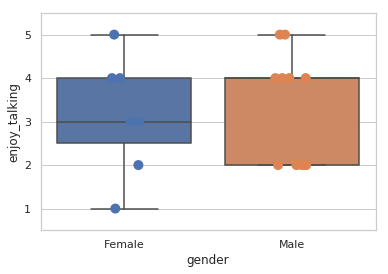

In [28]:
# I enjoyed talking to the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="enjoy_talking")
sns.stripplot(data=df_ass,x="gender",y="enjoy_talking", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

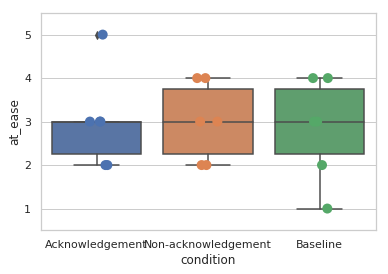

In [29]:
# I felt at ease around the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="at_ease")
sns.stripplot(data=df_ass,x="condition",y="at_ease", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

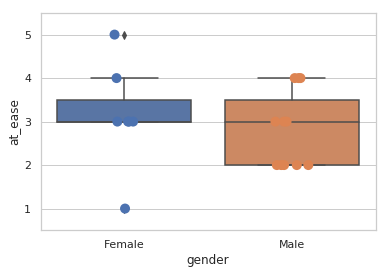

In [30]:
# I felt at ease around the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="at_ease")
sns.stripplot(data=df_ass,x="gender",y="at_ease", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

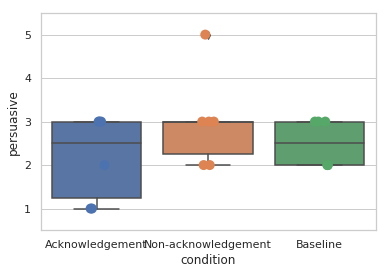

In [31]:
# The robot was persuasive vs condition
sns.boxplot(data=df_ass,x="condition",y="persuasive")
sns.stripplot(data=df_ass,x="condition",y="persuasive", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

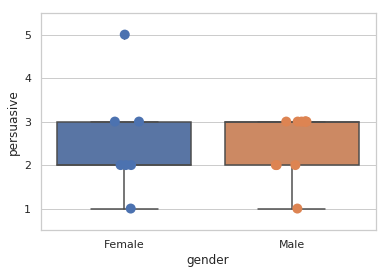

In [32]:
# The robot was persuasive vs gender
sns.boxplot(data=df_ass,x="gender",y="persuasive")
sns.stripplot(data=df_ass,x="gender",y="persuasive", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

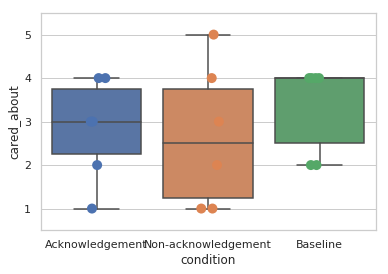

In [33]:
# I cared about the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="cared_about")
sns.stripplot(data=df_ass,x="condition",y="cared_about", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

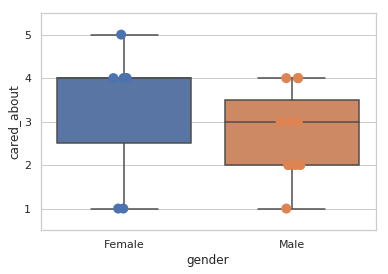

In [34]:
# I cared about the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="cared_about")
sns.stripplot(data=df_ass,x="gender",y="cared_about", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

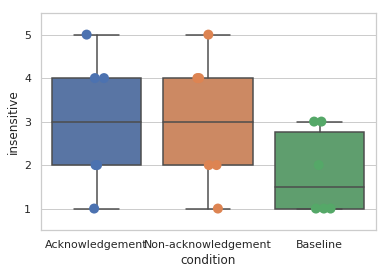

In [35]:
# I thought the robot was insensitive vs condition
sns.boxplot(data=df_ass,x="condition",y="insensitive")
sns.stripplot(data=df_ass,x="condition",y="insensitive", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

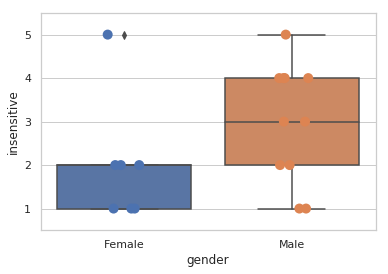

In [36]:
# I thought the robot was insensitive vs gender
sns.boxplot(data=df_ass,x="gender",y="insensitive")
sns.stripplot(data=df_ass,x="gender",y="insensitive", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

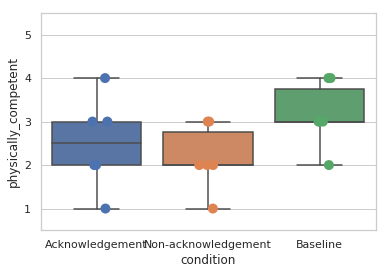

In [37]:
# I thought the robot was physically competent vs condition
sns.boxplot(data=df_ass,x="condition",y="physically_competent")
sns.stripplot(data=df_ass,x="condition",y="physically_competent", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

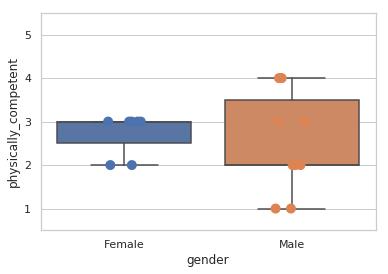

In [38]:
# I thought the robot was physically competent vs gender
sns.boxplot(data=df_ass,x="gender",y="physically_competent")
sns.stripplot(data=df_ass,x="gender",y="physically_competent", size=10)
plt.ylim(0.5,5.5)

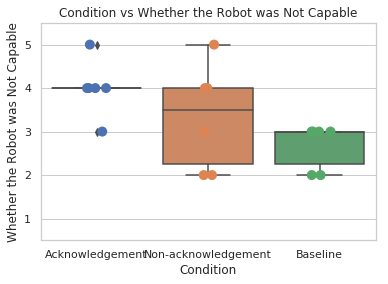

In [27]:
# I thought the robot was capable vs condition
sns.boxplot(data=df_ass,x="condition",y="capable")
sns.stripplot(data=df_ass,x="condition",y="capable", size=10)
plt.ylim(0.5,5.5)
plt.xlabel("Condition")
plt.ylabel("Whether the Robot was Not Capable")
plt.title("Condition vs Whether the Robot was Not Capable")
plt.savefig('condition_vs_notcapable.png')

(0.5, 5.5)

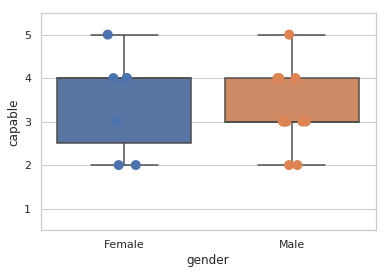

In [40]:
# I thought the robot was capable vs gender
sns.boxplot(data=df_ass,x="gender",y="capable")
sns.stripplot(data=df_ass,x="gender",y="capable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

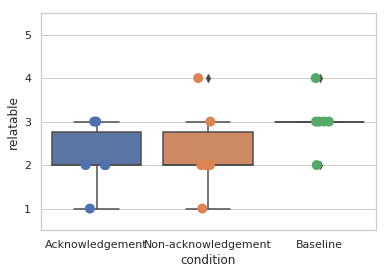

In [41]:
# I thought the robot was relatable vs condition
sns.boxplot(data=df_ass,x="condition",y="relatable")
sns.stripplot(data=df_ass,x="condition",y="relatable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

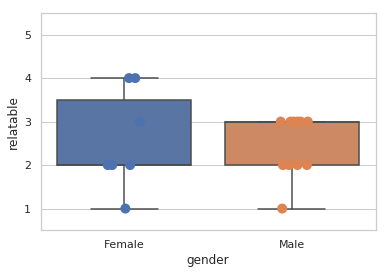

In [42]:
# I thought the robot was relatable vs gender
sns.boxplot(data=df_ass,x="gender",y="relatable")
sns.stripplot(data=df_ass,x="gender",y="relatable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

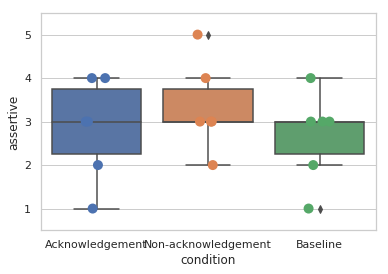

In [43]:
# I thought the robot was assertive vs condition
sns.boxplot(data=df_ass,x="condition",y="assertive")
sns.stripplot(data=df_ass,x="condition",y="assertive", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

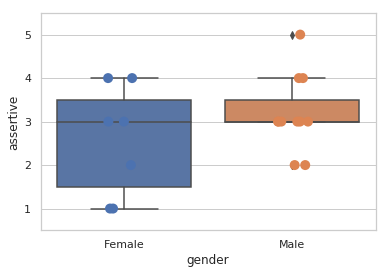

In [44]:
# I thought the robot was assertive vs gender
sns.boxplot(data=df_ass,x="gender",y="assertive")
sns.stripplot(data=df_ass,x="gender",y="assertive", size=10)
plt.ylim(0.5,5.5)

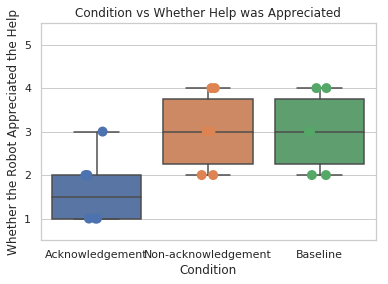

In [26]:
# I thought the robot appreciated my help vs condition
sns.boxplot(data=df_ass,x="condition",y="appreciated_help")
sns.stripplot(data=df_ass,x="condition",y="appreciated_help", size=10)
plt.ylim(0.5,5.5)
plt.xlabel("Condition")
plt.ylabel("Whether the Robot Appreciated the Help")
plt.title("Condition vs Whether Help was Appreciated")
plt.savefig('condition_vs_whetherhelpappreciated.png')

(0.5, 5.5)

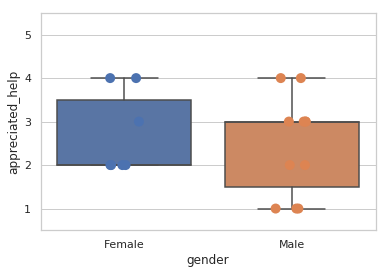

In [46]:
# I thought the robot appreciated my help vs gender
sns.boxplot(data=df_ass,x="gender",y="appreciated_help")
sns.stripplot(data=df_ass,x="gender",y="appreciated_help", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

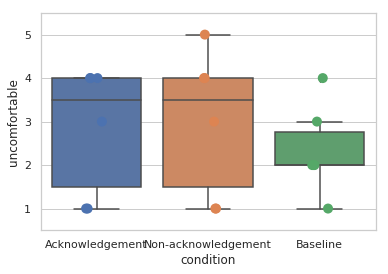

In [47]:
# I felt uncomfortable around the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="uncomfortable")
sns.stripplot(data=df_ass,x="condition",y="uncomfortable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

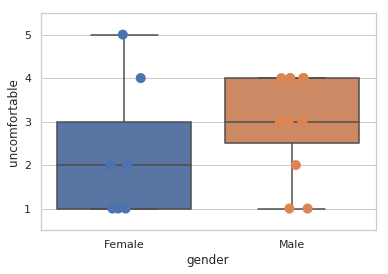

In [48]:
# I felt uncomfortable around the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="uncomfortable")
sns.stripplot(data=df_ass,x="gender",y="uncomfortable", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

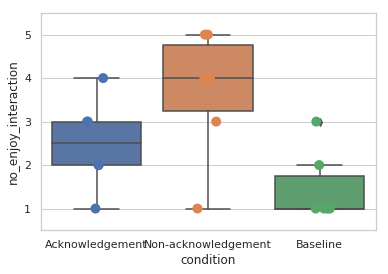

In [49]:
# I did not enjoy interacting with the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="no_enjoy_interaction")
sns.stripplot(data=df_ass,x="condition",y="no_enjoy_interaction", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

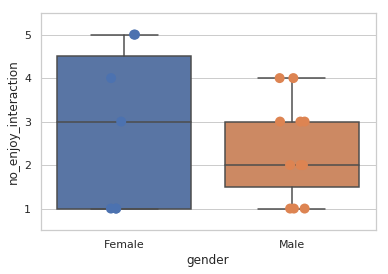

In [50]:
# I did not enjoy interacting with the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="no_enjoy_interaction")
sns.stripplot(data=df_ass,x="gender",y="no_enjoy_interaction", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

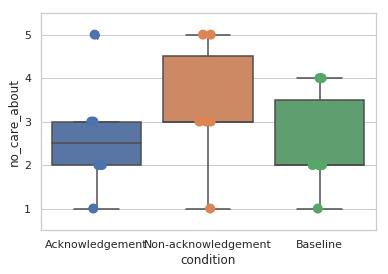

In [51]:
# I did not care about the robot vs condition
sns.boxplot(data=df_ass,x="condition",y="no_care_about")
sns.stripplot(data=df_ass,x="condition",y="no_care_about", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

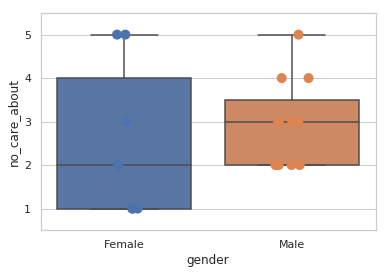

In [52]:
# I did not care about the robot vs gender
sns.boxplot(data=df_ass,x="gender",y="no_care_about")
sns.stripplot(data=df_ass,x="gender",y="no_care_about", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

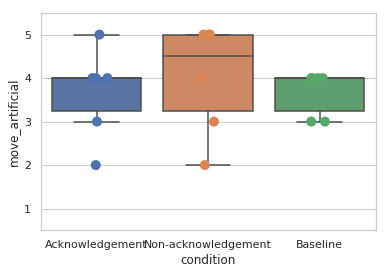

In [53]:
# I felt the robot moved artificially vs condition
sns.boxplot(data=df_ass,x="condition",y="move_artificial")
sns.stripplot(data=df_ass,x="condition",y="move_artificial", size=10)
plt.ylim(0.5,5.5)

(0.5, 5.5)

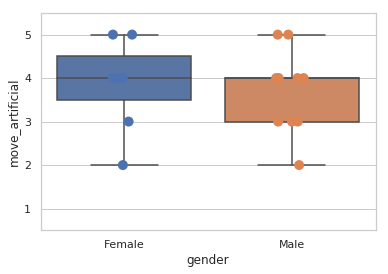

In [54]:
# I felt the robot moved artificially vs gender
sns.boxplot(data=df_ass,x="gender",y="move_artificial")
sns.stripplot(data=df_ass,x="gender",y="move_artificial", size=10)
plt.ylim(0.5,5.5)

In [55]:
df_no_bl = pd.read_csv("results_fin_sans_baseline.csv")
df_no_bl = df_no_bl[["condition","robot_experience","tech","help_attempts", "time_help_robot","gender","help_robot","sorry_robot","unfriendly","anxious","natural_movement","shy","no_sorry_robot","likeable","enjoy_talking","at_ease","persuasive","cared_about","insensitive","physically_competent","capable","relatable","assertive","appreciated_help","uncomfortable","no_enjoy_interaction","no_care_about","move_artificial","friendly","indifferent"]].dropna()
df_no_bl

,condition,robot_experience,tech,help_attempts,time_help_robot,gender,help_robot,sorry_robot,unfriendly,anxious,...,capable,relatable,assertive,appreciated_help,uncomfortable,no_enjoy_interaction,no_care_about,move_artificial,friendly,indifferent
0,Acknowledgement,1,4,4,37,Female,5,2,1,2,...,4,2,2,3,4,1,1,2,4,2
1,Non-acknowledgement,1,3,4,32,Female,5,1,1,4,...,2,2,3,4,1,5,1,3,4,2
2,Acknowledgement,3,5,3,177,Male,4,3,2,3,...,3,3,4,2,3,2,3,4,3,2
3,Non-acknowledgement,1,5,7,39,Male,3,3,2,3,...,4,3,2,3,3,4,3,4,5,3
4,Acknowledgement,4,4,3,50,Male,5,3,4,4,...,5,2,4,1,4,3,3,5,3,5
5,Non-acknowledgement,1,4,11,90,Female,5,2,2,2,...,4,4,3,4,1,1,3,5,5,2
6,Acknowledgement,1,5,2,30,Female,1,5,1,1,...,4,1,1,2,1,4,5,4,5,5
7,Non-acknowledgement,2,5,1,15,Male,4,1,3,5,...,2,1,5,3,4,4,5,5,3,5
8,Acknowledgement,1,5,6,72,Male,4,1,1,3,...,4,3,3,1,4,2,2,3,5,4
9,Acknowledgement,1,4,5,52,Male,4,1,2,1,...,4,2,3,1,1,3,2,4,4,5


(0, 12)

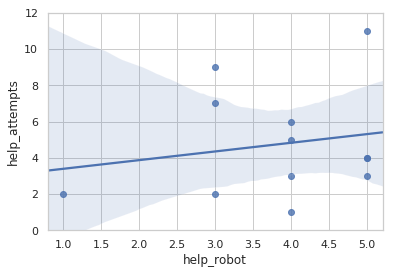

In [56]:
# Correlation between wanting to help robot and number of times tried to help 
sns.regplot(df_no_bl.help_robot, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

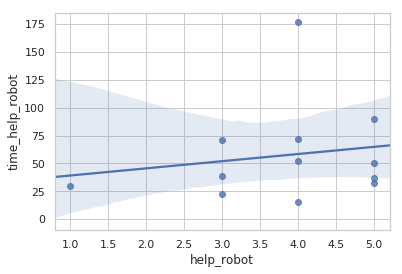

In [57]:
# Correlation between wanting to help robot and length of time tried to help 
sns.regplot(df_no_bl.help_robot, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

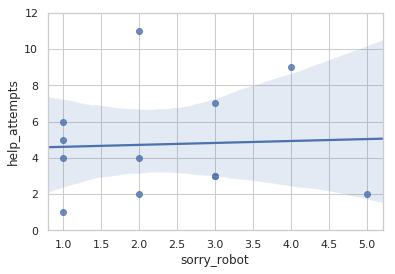

In [58]:
# Correlation between feeling sorry for the robot and number of times tried to help 
sns.regplot(df_no_bl.sorry_robot, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

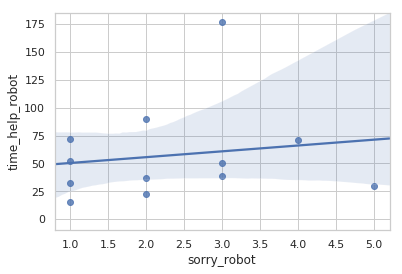

In [59]:
# Correlation between feeling sorry for the robot and length of time tried to help 
sns.regplot(df_no_bl.sorry_robot, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

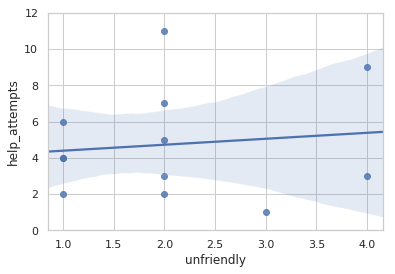

In [60]:
# Correlation between thinking robot is unfriendly and number of times tried to help
sns.regplot(df_no_bl.unfriendly, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

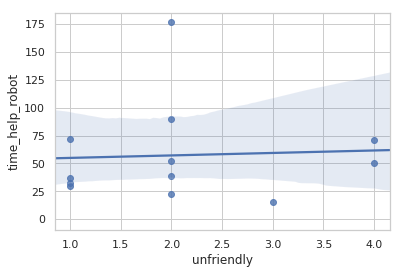

In [61]:
# Correlation between thinking robot is unfriendly and length of time tried to help 
sns.regplot(df_no_bl.unfriendly, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

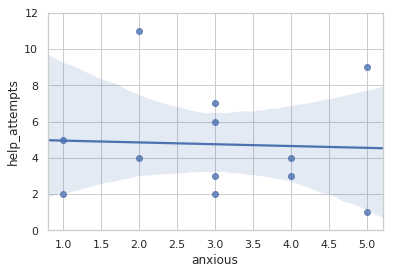

In [62]:
# Correlation between robot making participant anxious and number of times tried to help
sns.regplot(df_no_bl.anxious, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

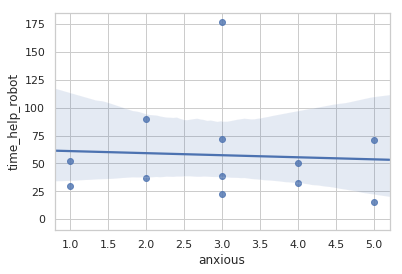

In [63]:
# Correlation between robot making participant anxious and length of time tried to help
sns.regplot(df_no_bl.anxious, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

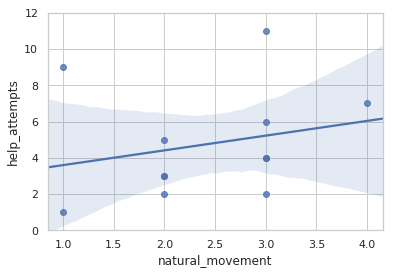

In [64]:
# Correlation between robot having natural movement and number of times tried to help
sns.regplot(df_no_bl.natural_movement, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

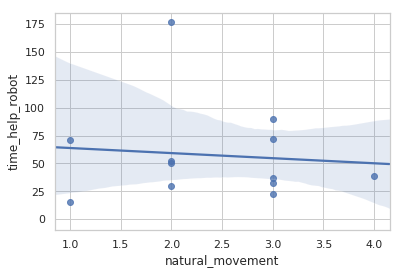

In [65]:
# Correlation between robot having natural movement and length of time tried to help
sns.regplot(df_no_bl.natural_movement, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

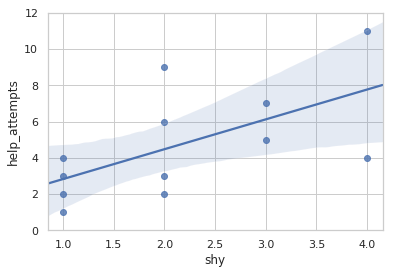

In [66]:
# Correlation between thinking robot is shy and number of times tried to help
sns.regplot(df_no_bl.shy, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

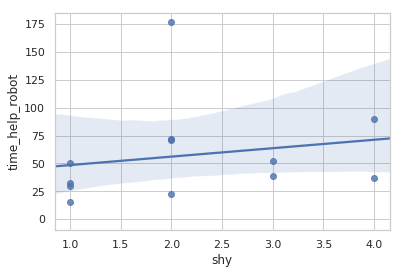

In [67]:
# Correlation between thinking robot is shy and length_of_time tried to help
sns.regplot(df_no_bl.shy, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

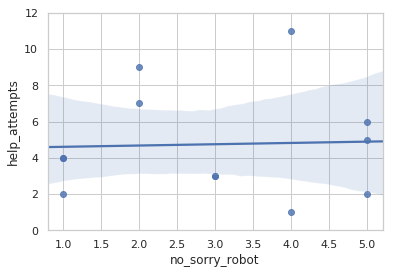

In [68]:
# Correlation between not feeling sorry for the robot and number of times tried to help
sns.regplot(df_no_bl.no_sorry_robot, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

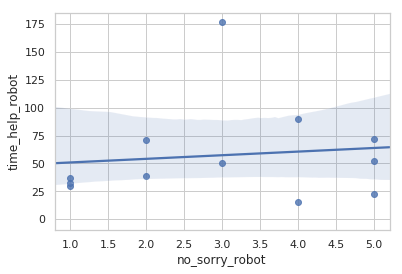

In [69]:
# Correlation between not feeling sorry for the robot and length of time tried to help
sns.regplot(df_no_bl.no_sorry_robot, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

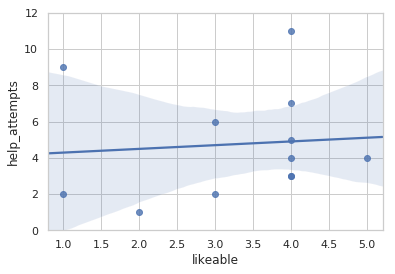

In [70]:
# Correlation between thinking robot is likeable and number of times tried to help
sns.regplot(df_no_bl.likeable, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

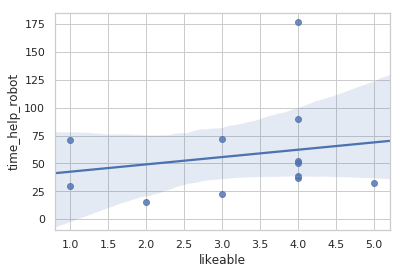

In [71]:
# Correlation between thinking robot is likeable and length of time tried to help
sns.regplot(df_no_bl.likeable, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

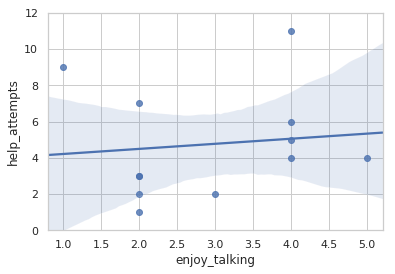

In [72]:
# Correlation between enjoying talking to the robot and number of times tried to help
sns.regplot(df_no_bl.enjoy_talking, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

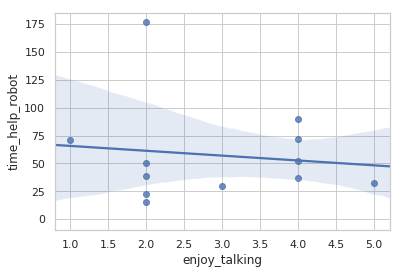

In [73]:
# Correlation between enjoying talking to the robot and length of time tried to help
sns.regplot(df_no_bl.enjoy_talking, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

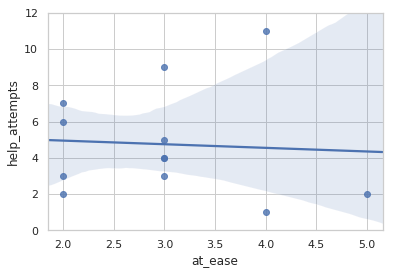

In [74]:
# Correlation between feeling at ease around the robot and number of times tried to help
sns.regplot(df_no_bl.at_ease, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

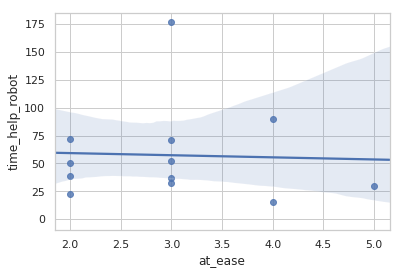

In [75]:
# Correlation between feeling at ease around the robot and length of time tried to help
sns.regplot(df_no_bl.at_ease, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

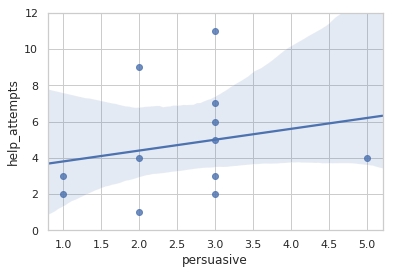

In [76]:
# Correlation between thinking robot is persuasive and number of times tried to help
sns.regplot(df_no_bl.persuasive, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

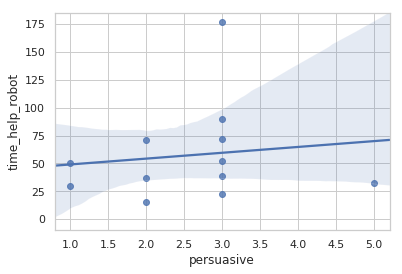

In [77]:
# Correlation between thinking robot is persuasive and length of time tried to help
sns.regplot(df_no_bl.persuasive, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

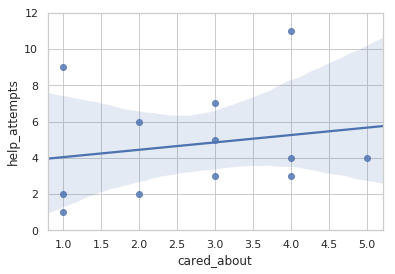

In [78]:
# Correlation between caring about robot and number of times tried to help
sns.regplot(df_no_bl.cared_about, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

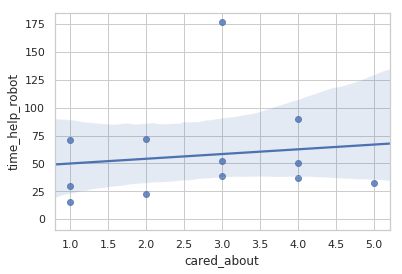

In [79]:
# Correlation between caring about robot and length of time tried to help
sns.regplot(df_no_bl.cared_about, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

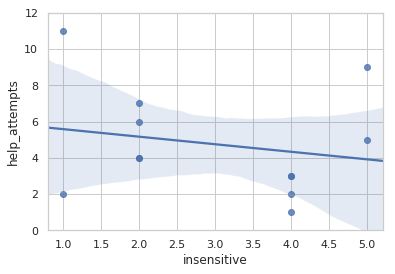

In [80]:
# Correlation between thinking robot is insensitive and number of times tried to help
sns.regplot(df_no_bl.insensitive, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

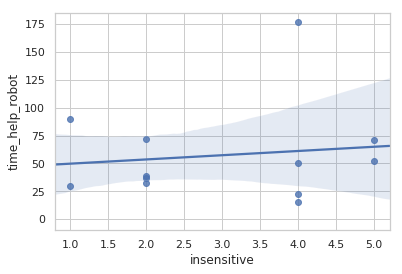

In [81]:
# Correlation between caring about robot and length_of_time tried to help
sns.regplot(df_no_bl.insensitive, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

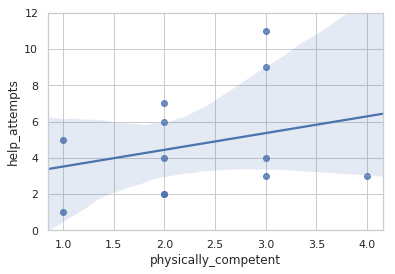

In [82]:
# Correlation between thinking robot is physically competent and number of times tried to help
sns.regplot(df_no_bl.physically_competent, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

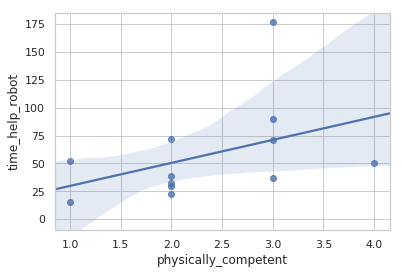

In [83]:
# Correlation between thinking robot is physically competent and length of time tried to help
sns.regplot(df_no_bl.physically_competent, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

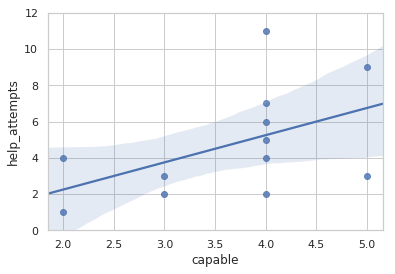

In [84]:
# Correlation between thinking robot is capable and number of times tried to help
sns.regplot(df_no_bl.capable, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

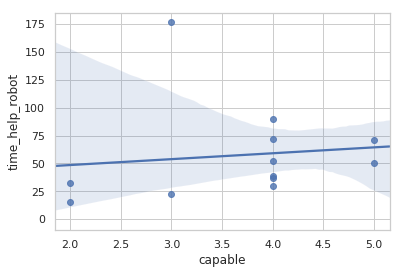

In [85]:
# Correlation between thinking robot is capable and length of time tried to help
sns.regplot(df_no_bl.capable, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

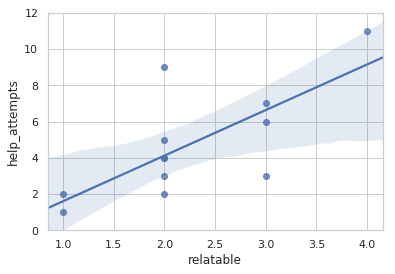

In [86]:
# Correlation between thinking robot is relatable and number of times tried to help
sns.regplot(df_no_bl.relatable, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

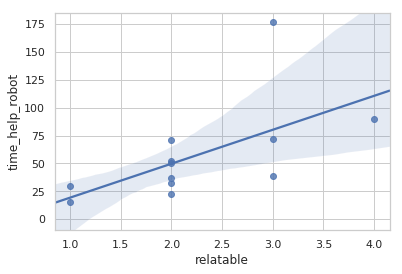

In [87]:
# Correlation between thinking robot is relatable and length of time tried to help
sns.regplot(df_no_bl.relatable, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

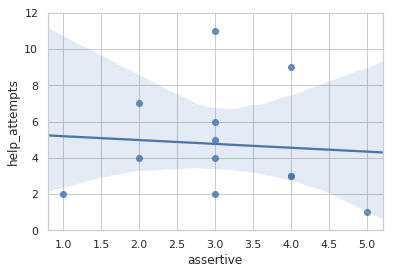

In [88]:
# Correlation between thinking robot is assertive and number of times tried to help
sns.regplot(df_no_bl.assertive, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

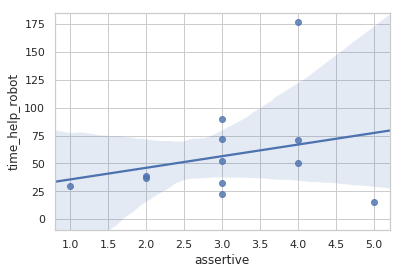

In [89]:
# Correlation between thinking robot is assertive and length of time tried to help
sns.regplot(df_no_bl.assertive, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

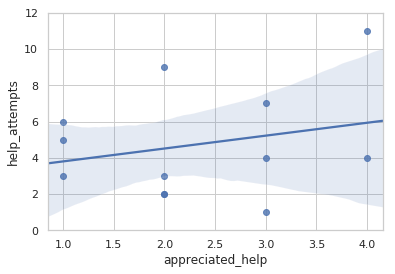

In [90]:
# Correlation between thinking robot appreciated the help and number of times tried to help
sns.regplot(df_no_bl.appreciated_help, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

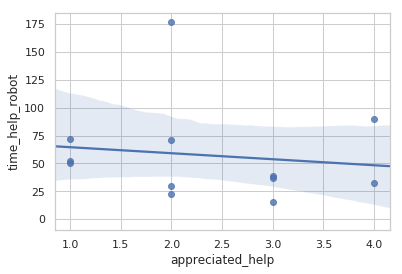

In [91]:
# Correlation between thinking robot appreciated the help and length of time tried to help
sns.regplot(df_no_bl.appreciated_help, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

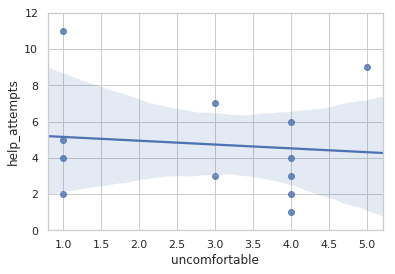

In [92]:
# Correlation between robot making participants uncomfortable and number of times tried to help
sns.regplot(df_no_bl.uncomfortable, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

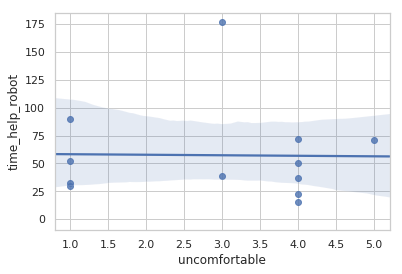

In [93]:
# Correlation between robot making participants uncomfortable and length of time tried to help
sns.regplot(df_no_bl.uncomfortable, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

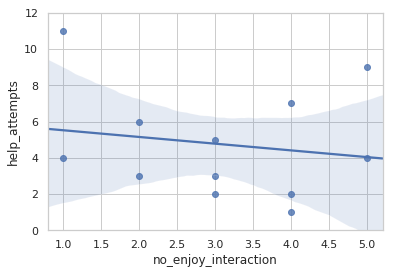

In [94]:
# Correlation between not enjoying the interaction and number of times tried to help
sns.regplot(df_no_bl.no_enjoy_interaction, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

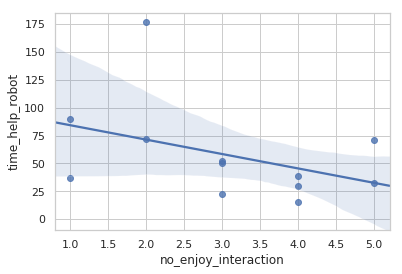

In [95]:
# Correlation between not enjoying the interaction and length of time tried to help
sns.regplot(df_no_bl.no_enjoy_interaction, df_no_bl.time_help_robot)
plt.ylim(-10,185)

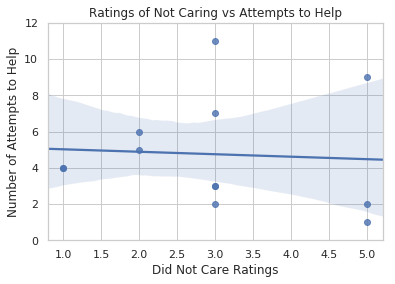

In [136]:
# Correlation between not caring about the robot and number of times tried to help
sns.regplot(df_no_bl.no_care_about, df_no_bl.help_attempts)
plt.ylim(0,12)
plt.xlabel("Did Not Care Ratings")
plt.ylabel("Number of Attempts to Help")
plt.title("Ratings of Not Caring vs Attempts to Help")
plt.savefig('nocareabout_helpattempts.png')

(-10, 185)

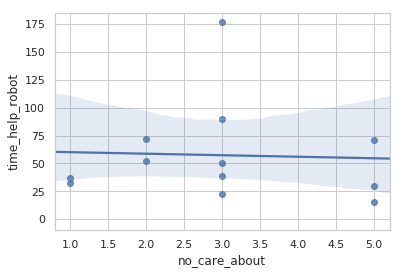

In [97]:
# Correlation between not caring about the robot and length of time tried to help
sns.regplot(df_no_bl.no_care_about, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

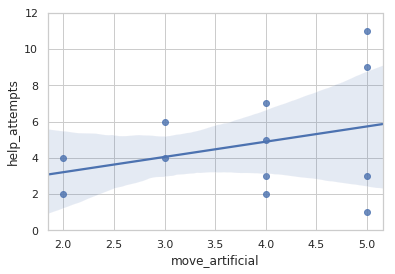

In [98]:
# Correlation between thinking robot move artificially and number of times tried to help
sns.regplot(df_no_bl.move_artificial, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

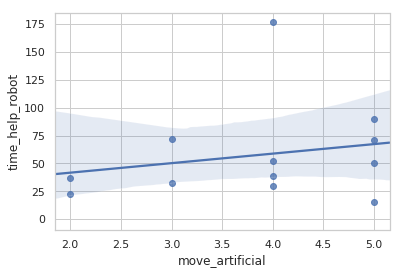

In [99]:
# Correlation between thinking robot move artificially and length of time tried to help
sns.regplot(df_no_bl.move_artificial, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

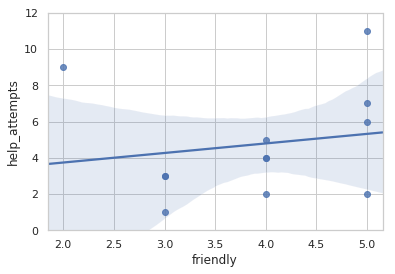

In [100]:
# Correlation between thinking the robot was friendly and number of times tried to help
sns.regplot(df_no_bl.friendly, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

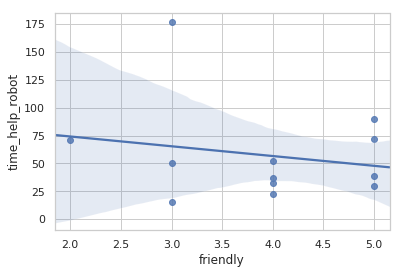

In [101]:
# Correlation between thinking the robot was friendly and length of time tried to help
sns.regplot(df_no_bl.friendly, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 12)

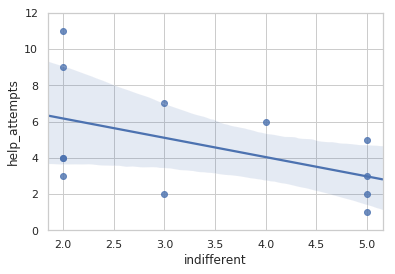

In [102]:
# Correlation between thinking the robot was indifferent and number of times tried to help
sns.regplot(df_no_bl.indifferent, df_no_bl.help_attempts)
plt.ylim(0,12)

(-10, 185)

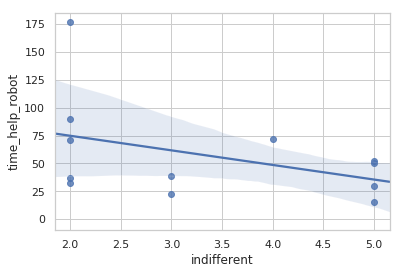

In [103]:
# Correlation between thinking the robot was indifferent and length of time tried to help
sns.regplot(df_no_bl.indifferent, df_no_bl.time_help_robot)
plt.ylim(-10,185)

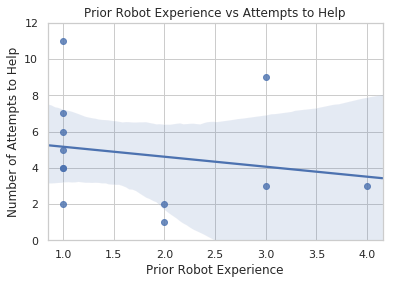

In [138]:
# Correlation between prior robot experience and the number of times tried to help the robot
sns.regplot(df_no_bl.robot_experience, df_no_bl.help_attempts)
plt.ylim(0,12)
plt.xlabel("Prior Robot Experience")
plt.ylabel("Number of Attempts to Help")
plt.title("Prior Robot Experience vs Attempts to Help")
plt.savefig('pre_helpattempts.png')

(-10, 185)

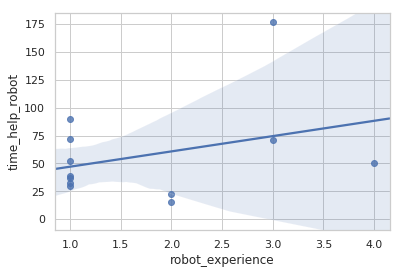

In [105]:
# Correlation between prior robot experience and the length of time tried to help the robot
sns.regplot(df_no_bl.robot_experience, df_no_bl.time_help_robot)
plt.ylim(-10,185)

(0, 6)

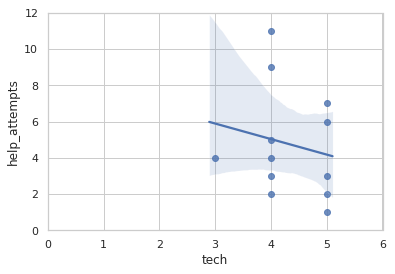

In [140]:
# Correlation between comfort with modern technology and the number of times tried to help the robot
sns.regplot(df_no_bl.tech, df_no_bl.help_attempts)
plt.ylim(0,12)
plt.xlim(0,6)

(-10, 185)

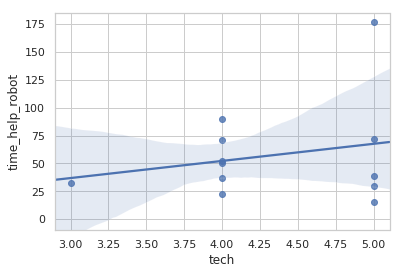

In [107]:
# Correlation between comfort with modern technology and the length of time tried to help the robot
sns.regplot(df_no_bl.tech, df_no_bl.time_help_robot)
plt.ylim(-10,185)

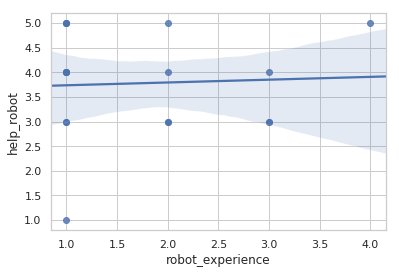

In [108]:
# Correlation between prior robot experience and how participants rated how much they wanted to help the robot
sns.regplot(df.robot_experience, df_ass.help_robot)

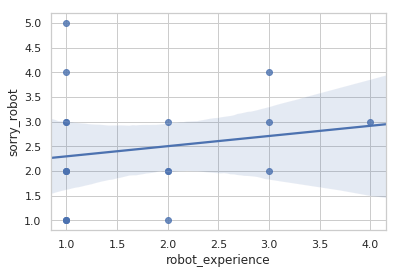

In [109]:
# Correlation between prior robot experience and 
# how participants rated how sorry they felt for the robot
sns.regplot(df.robot_experience, df_ass.sorry_robot)

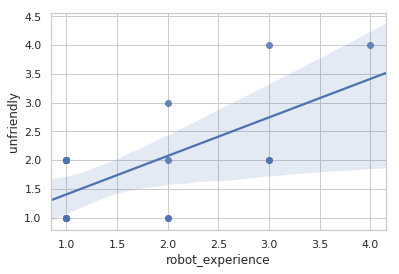

In [110]:
# Correlation between prior robot experience and 
# how participants rated how unfriendly the robot was
sns.regplot(df.robot_experience, df_ass.unfriendly)

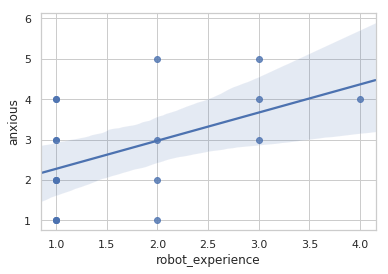

In [111]:
# Correlation between prior robot experience and 
# how participants rated how anxious the robot made them
sns.regplot(df.robot_experience, df_ass.anxious)

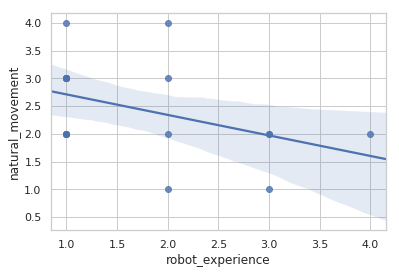

In [112]:
# Correlation between prior robot experience and 
# how participants rated how natural the robot's movement was
sns.regplot(df.robot_experience, df_ass.natural_movement)

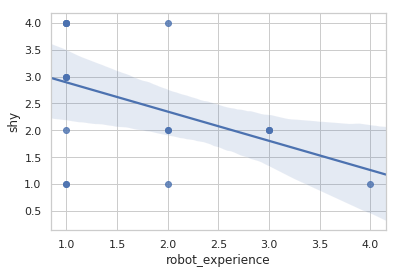

In [113]:
# Correlation between prior robot experience and 
# how participants rated how shy they felt the robot was
sns.regplot(df.robot_experience, df_ass.shy)

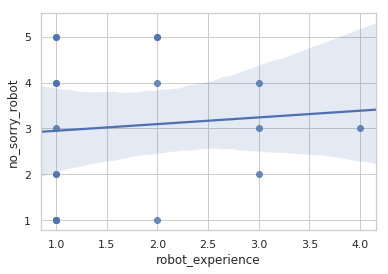

In [114]:
# Correlation between prior robot experience and 
# how participants rated how not sorry they felt for the robot
sns.regplot(df.robot_experience, df_ass.no_sorry_robot)

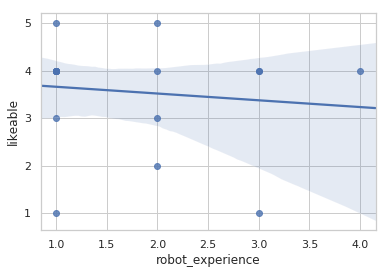

In [115]:
# Correlation between prior robot experience and 
# how participants rated how likeable the robot was
sns.regplot(df.robot_experience, df_ass.likeable)

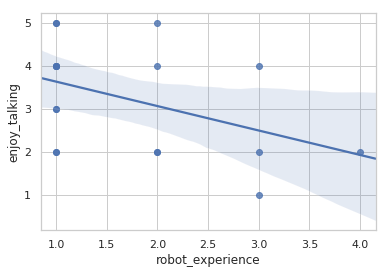

In [116]:
# Correlation between prior robot experience and 
# how participants rated how much they enjoyed talking to the robot
sns.regplot(df.robot_experience, df_ass.enjoy_talking)

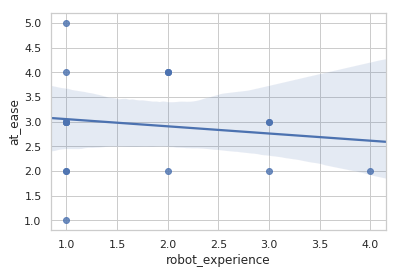

In [117]:
# Correlation between prior robot experience and 
# how participants rated how at ease they felt around the robot
sns.regplot(df.robot_experience, df_ass.at_ease)

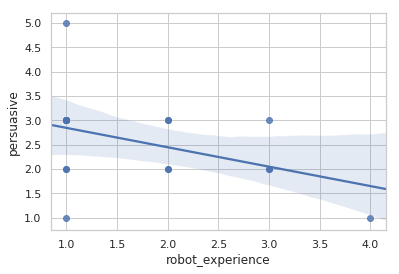

In [118]:
# Correlation between prior robot experience and 
# how participants rated how persuasive they felt for the robot was
sns.regplot(df.robot_experience, df_ass.persuasive)

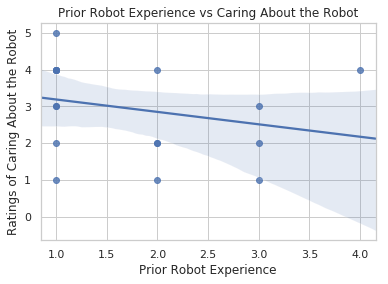

In [137]:
# Correlation between prior robot experience and 
# how participants rated how much they cared about the robot
sns.regplot(df.robot_experience, df_ass.cared_about)
plt.xlabel("Prior Robot Experience")
plt.ylabel("Ratings of Caring About the Robot")
plt.title("Prior Robot Experience vs Caring About the Robot")
plt.savefig('pre_careabout.png')

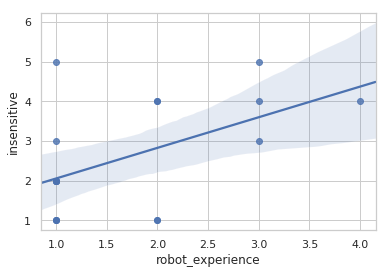

In [120]:
# Correlation between prior robot experience and 
# how participants rated how insensitive they felt  the robot was
sns.regplot(df.robot_experience, df_ass.insensitive)

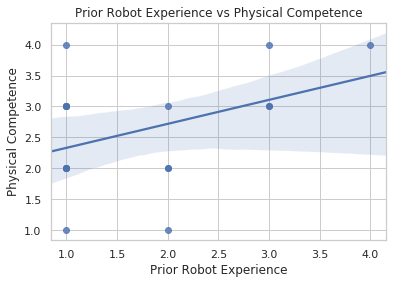

In [130]:
# Correlation between prior robot experience and 
# how participants rated how physically competent they felt the robot was
fig = sns.regplot(df.robot_experience, df_ass.physically_competent)
plt.xlabel("Prior Robot Experience")
plt.ylabel("Physical Competence")
plt.title("Prior Robot Experience vs Physical Competence")
plt.savefig('pre_physicalcompetence.png')


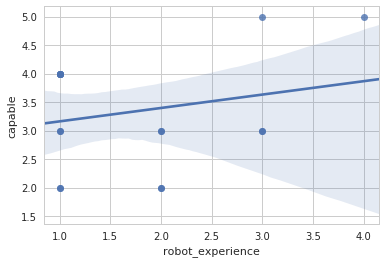

In [121]:
# Correlation between prior robot experience and 
# how participants rated how capable they felt the robot was
sns.regplot(df.robot_experience, df_ass.capable)

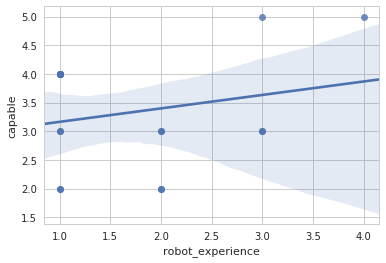

In [122]:
# Correlation between prior robot experience and 
# how participants rated how capable they felt the robot was
sns.regplot(df.robot_experience, df_ass.capable)

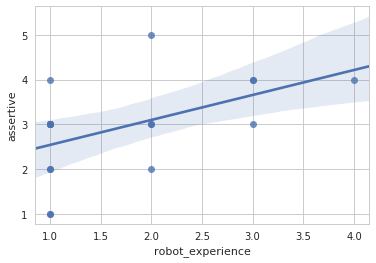

In [123]:
# Correlation between prior robot experience and 
# how participants rated how assertive they felt the robot was
sns.regplot(df.robot_experience, df_ass.assertive)

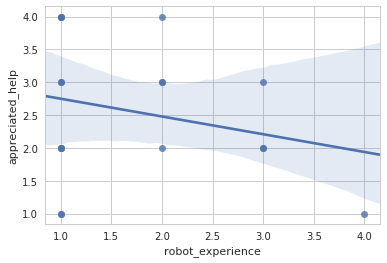

In [124]:
# Correlation between prior robot experience and 
# how participants rated how much they felt the robot appreciated their
# help
sns.regplot(df.robot_experience, df_ass.appreciated_help)

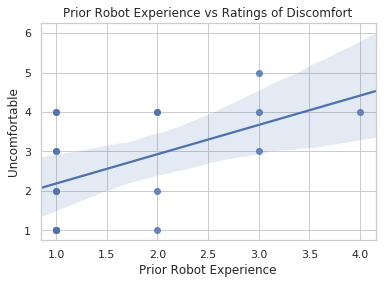

In [134]:
# Correlation between prior robot experience and 
# how participants rated how uncomfortable they felt around the robot
sns.regplot(df.robot_experience, df_ass.uncomfortable)
plt.xlabel("Prior Robot Experience")
plt.ylabel("Uncomfortable")
plt.title("Prior Robot Experience vs Ratings of Discomfort")
plt.savefig('pre_uncomfortable.png')


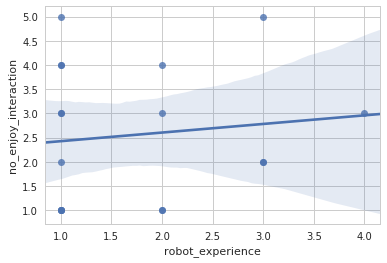

In [126]:
# Correlation between prior robot experience and 
# how participants rated how mcuh they didn't enjoy the interaction
sns.regplot(df.robot_experience, df_ass.no_enjoy_interaction)

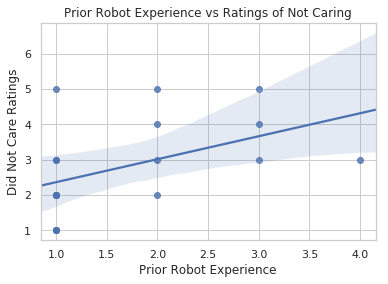

In [135]:
# Correlation between prior robot experience and 
# how participants rated how much they didnt care about the robot
sns.regplot(df.robot_experience, df_ass.no_care_about)
plt.xlabel("Prior Robot Experience")
plt.ylabel("Did Not Care Ratings")
plt.title("Prior Robot Experience vs Ratings of Not Caring")
plt.savefig('pre_care_about.png')

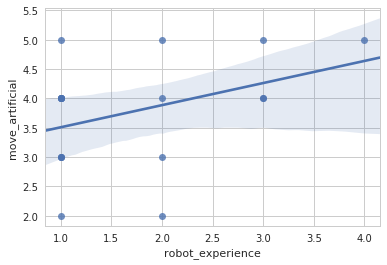

In [128]:
# Correlation between prior robot experience and 
# how participants rated how much they felt the robot moved artificially
sns.regplot(df.robot_experience, df_ass.move_artificial)

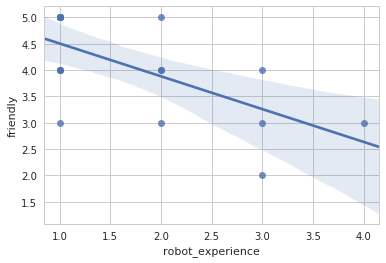

In [129]:
# Correlation between prior robot experience and 
# how participants rated how friendly they felt the robot was
sns.regplot(df.robot_experience, df_ass.friendly)

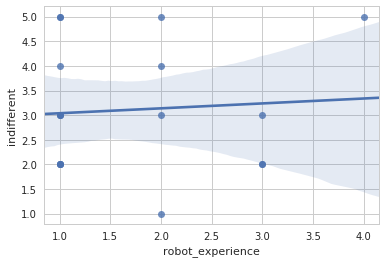

In [130]:
# Correlation between prior robot experience and 
# how participants rated how indifferent they felt the robot was
sns.regplot(df.robot_experience, df_ass.indifferent)

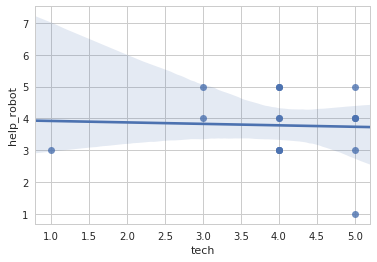

In [131]:
# Correlation between comfort with modern technology and 
# how participants rated how much they wanted to help the robot
sns.regplot(df.tech, df_ass.help_robot)

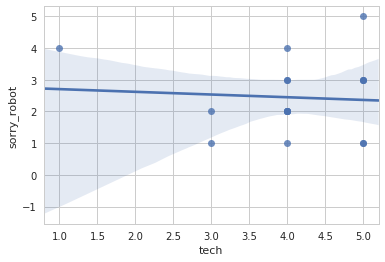

In [132]:
# Correlation between comfort with modern technology and 
# how participants rated how sorry they felt for the robot
sns.regplot(df.tech, df_ass.sorry_robot)

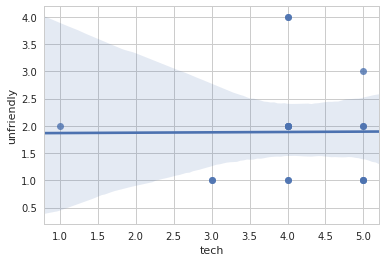

In [133]:
# Correlation between comfort with modern technology and 
# how participants rated how unfriendly they felt the robot was
sns.regplot(df.tech, df_ass.unfriendly)

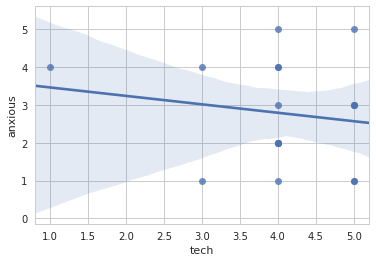

In [134]:
# Correlation between comfort with modern technology and 
# how participants rated how anxious the robot made them
sns.regplot(df.tech, df_ass.anxious)

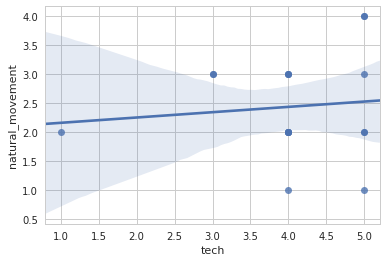

In [135]:
# Correlation between comfort with modern technology and 
# how participants rated how natural_movement they felt the robot was
sns.regplot(df.tech, df_ass.natural_movement)

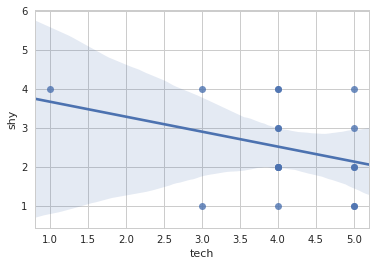

In [136]:
# Correlation between comfort with modern technology and 
# how participants rated how shy they felt the robot was
sns.regplot(df.tech, df_ass.shy)

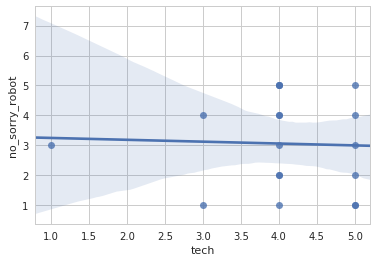

In [137]:
# Correlation between comfort with modern technology and 
# how participants rated how not sorry they felt for the robot
sns.regplot(df.tech, df_ass.no_sorry_robot)

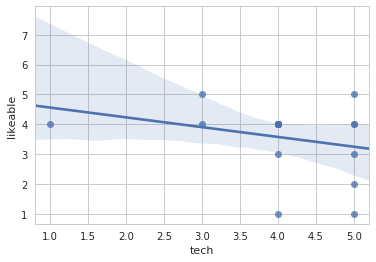

In [138]:
# Correlation between comfort with modern technology and 
# how participants rated how likeable they felt the robot was
sns.regplot(df.tech, df_ass.likeable)

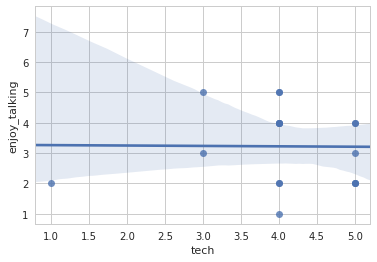

In [139]:
# Correlation between comfort with modern technology and 
# how participants rated how much they enjoy talking to the robot 
sns.regplot(df.tech, df_ass.enjoy_talking)

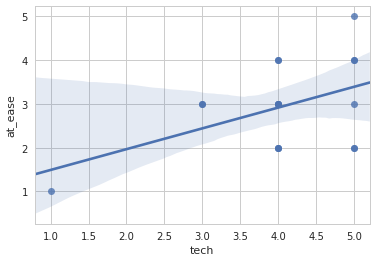

In [140]:
# Correlation between comfort with modern technology and 
# how participants rated how at ease they felt around the robot
sns.regplot(df.tech, df_ass.at_ease)

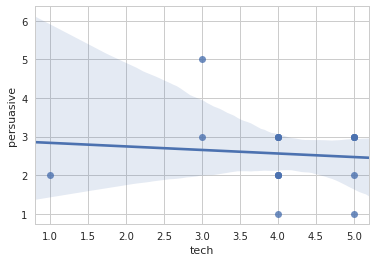

In [141]:
# Correlation between comfort with modern technology and 
# how participants rated how persuasive they felt the robot was
sns.regplot(df.tech, df_ass.persuasive)

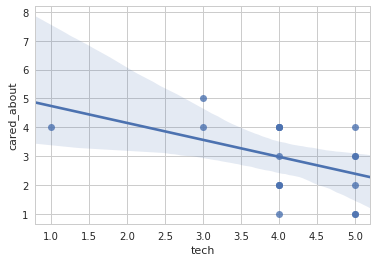

In [142]:
# Correlation between comfort with modern technology and 
# how participants rated how much they cared aboiut the robot
sns.regplot(df.tech, df_ass.cared_about)

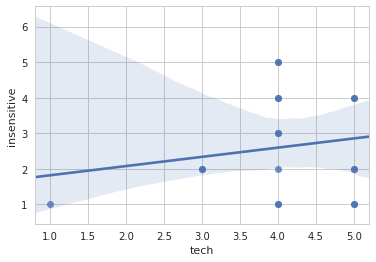

In [143]:
# Correlation between comfort with modern technology and 
# how participants rated how insensitive they felt the robot was
sns.regplot(df.tech, df_ass.insensitive)

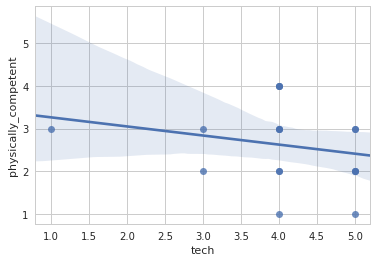

In [144]:
# Correlation between comfort with modern technology and 
# how participants rated how physically competent they felt the robot was
sns.regplot(df.tech, df_ass.physically_competent)

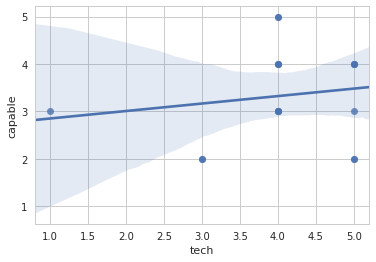

In [145]:
# Correlation between comfort with modern technology and 
# how participants rated how capable they felt the robot was
sns.regplot(df.tech, df_ass.capable)

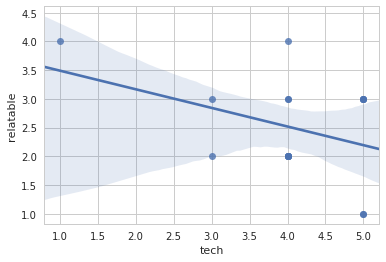

In [146]:
# Correlation between comfort with modern technology and 
# how participants rated how relatable they felt the robot was
sns.regplot(df.tech, df_ass.relatable)

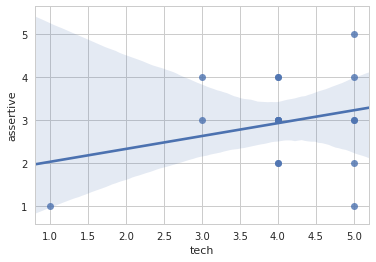

In [147]:
# Correlation between comfort with modern technology and 
# how participants rated how assertive they felt the robot was
sns.regplot(df.tech, df_ass.assertive)

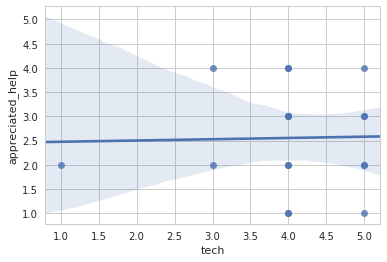

In [148]:
# Correlation between comfort with modern technology and 
# how participants rated how much the robot appreciated the help
sns.regplot(df.tech, df_ass.appreciated_help)

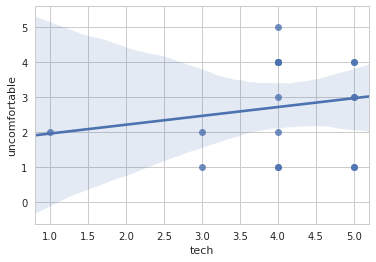

In [149]:
# Correlation between comfort with modern technology and 
# how participants rated how uncomfortable they felt the robot was
sns.regplot(df.tech, df_ass.uncomfortable)

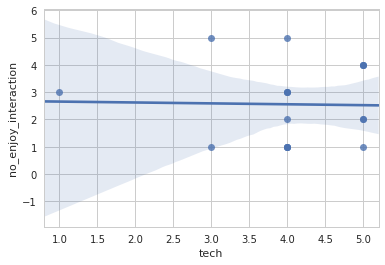

In [150]:
# Correlation between comfort with modern technology and 
# how participants rated how much they enjoyed the robot interaction
sns.regplot(df.tech, df_ass.no_enjoy_interaction)

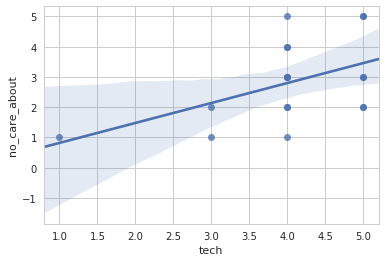

In [151]:
# Correlation between comfort with modern technology and 
# how participants rated how much they didnt care about the robot
sns.regplot(df.tech, df_ass.no_care_about)

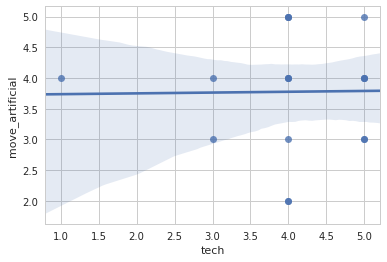

In [152]:
# Correlation between comfort with modern technology and 
# how participants rated how articifically the robot moved
sns.regplot(df.tech, df_ass.move_artificial)

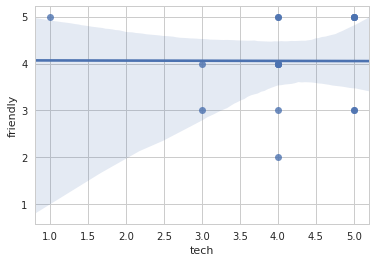

In [153]:
# Correlation between comfort with modern technology and 
# how participants rated how friendly they felt the robot was
sns.regplot(df.tech, df_ass.friendly)

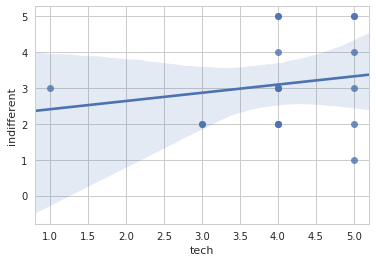

In [154]:
# Correlation between comfort with modern technology and 
# how participants rated how indifferent they felt the robot was
sns.regplot(df.tech, df_ass.indifferent)